**1. Consider a neural network with two hidden layers: p = 4 input units, 2 units in the first hidden layer, 3 units in the second hidden layer, and a single output.**

**(a) Draw a picture of the network, similar to Figures 10.1 or 10.4.**

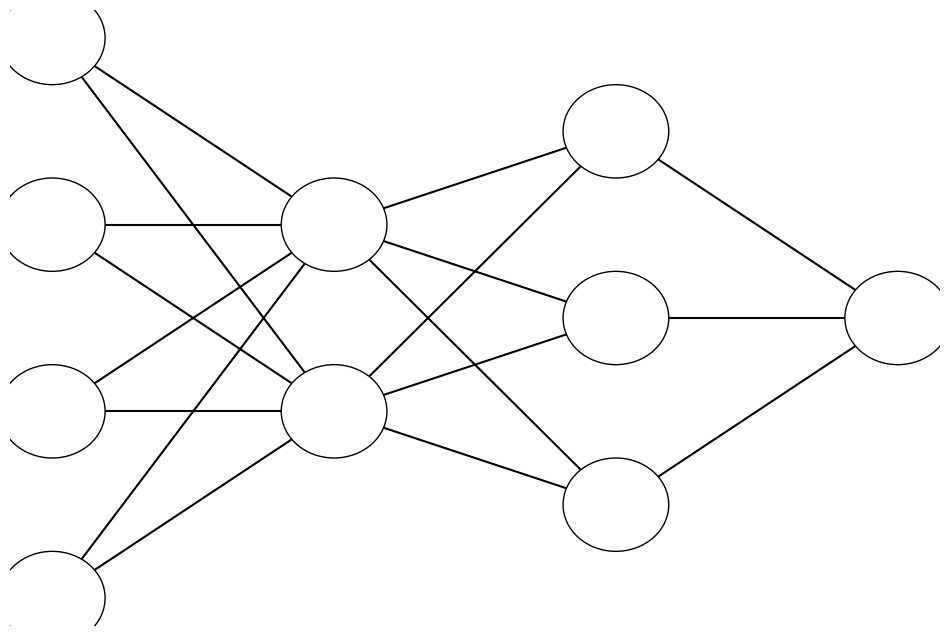

In [12]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for j in range(layer_size):
            circle = plt.Circle((left + i*h_spacing, layer_top - j*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                ax.plot([left + i*h_spacing, left + (i+1)*h_spacing],
                        [layer_top_a - j*v_spacing, layer_top_b - k*v_spacing], 'k')

fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 2, 3, 1])
plt.show()


**(b) Write out an expression for $f(X)$, assuming ReLU activation functions. Be as explicit as you can!**

* Input: $p = 4$ features, $X = [x_1, x_2, x_3, x_4]^T$
* First hidden layer: 2 units
* Second hidden layer: 3 units
* Output layer: 1 unit
* Activation function: ReLU ($\text{ReLU}(z) = \max(0, z)$)

* First hidden layer: weights $W^{(1)} \in \mathbb{R}^{2 \times 4}$, biases $b^{(1)} \in \mathbb{R}^{2}$
* Second hidden layer: weights $W^{(2)} \in \mathbb{R}^{3 \times 2}$, biases $b^{(2)} \in \mathbb{R}^{3}$
* Output layer: weights $W^{(3)} \in \mathbb{R}^{1 \times 3}$, bias $b^{(3)} \in \mathbb{R}$

$$
Z^{(1)} = W^{(1)} X + b^{(1)} \quad \in \mathbb{R}^2
$$

$$
A^{(1)} = \text{ReLU}(Z^{(1)}) = \text{ReLU}(W^{(1)} X + b^{(1)})
$$

$$
Z^{(2)} = W^{(2)} A^{(1)} + b^{(2)} \quad \in \mathbb{R}^3
$$

$$
A^{(2)} = \text{ReLU}(Z^{(2)}) = \text{ReLU}(W^{(2)} \, \text{ReLU}(W^{(1)} X + b^{(1)}) + b^{(2)})
$$

$$
f(X) = Z^{(3)} = W^{(3)} A^{(2)} + b^{(3)} 
= W^{(3)} \, \text{ReLU}(W^{(2)} \, \text{ReLU}(W^{(1)} X + b^{(1)}) + b^{(2)}) + b^{(3)}
$$

Let’s denote:

$$
W^{(1)} = 
\begin{bmatrix} 
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} & w_{14}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} & w_{24}^{(1)} 
\end{bmatrix}, 
\quad 
b^{(1)} = \begin{bmatrix} b_1^{(1)} \\ b_2^{(1)} \end{bmatrix}
$$

$$
Z_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + w_{13}^{(1)}x_3 + w_{14}^{(1)}x_4 + b_1^{(1)}
$$

$$
Z_2^{(1)} = w_{21}^{(1)}x_1 + w_{22}^{(1)}x_2 + w_{23}^{(1)}x_3 + w_{24}^{(1)}x_4 + b_2^{(1)}
$$

$$
A_1^{(1)} = \text{ReLU}(Z_1^{(1)}), \quad A_2^{(1)} = \text{ReLU}(Z_2^{(1)})
$$

Second hidden layer with 3 units:

$$
W^{(2)} =
\begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)} \\
w_{31}^{(2)} & w_{32}^{(2)}
\end{bmatrix}, 
\quad 
b^{(2)} = \begin{bmatrix} b_1^{(2)} \\ b_2^{(2)} \\ b_3^{(2)} \end{bmatrix}
$$

$$
Z_1^{(2)} = w_{11}^{(2)} A_1^{(1)} + w_{12}^{(2)} A_2^{(1)} + b_1^{(2)}, \quad 
Z_2^{(2)} = w_{21}^{(2)} A_1^{(1)} + w_{22}^{(2)} A_2^{(1)} + b_2^{(2)}, 
$$

$$
Z_3^{(2)} = w_{31}^{(2)} A_1^{(1)} + w_{32}^{(2)} A_2^{(1)} + b_3^{(2)}
$$

$$
A_i^{(2)} = \text{ReLU}(Z_i^{(2)}) \quad (i = 1,2,3)
$$

$$
f(X) = W^{(3)} A^{(2)} + b^{(3)} = w_1^{(3)} A_1^{(2)} + w_2^{(3)} A_2^{(2)} + w_3^{(3)} A_3^{(2)} + b^{(3)}
$$

**(c) Now plug in some values for the coefficients and write out the value of $f(X)$.**

$$
W^{(1)} = 
\begin{bmatrix} 
1 & -1 & 0 & 2 \\ 
0 & 1 & -1 & 1 
\end{bmatrix}, \quad
b^{(1)} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

$$
W^{(2)} = 
\begin{bmatrix} 
1 & 0 \\ 
-1 & 1 \\ 
0 & 2 
\end{bmatrix}, \quad
b^{(2)} = \begin{bmatrix} 0 \\ -1 \\ 1 \end{bmatrix}
$$

$$
W^{(3)} = \begin{bmatrix} 1 & -2 & 1 \end{bmatrix}, \quad b^{(3)} = 0
$$

$$
X = \begin{bmatrix} 1 \\ 2 \\ -1 \\ 0 \end{bmatrix}
$$

$$
Z^{(1)} = W^{(1)} X + b^{(1)}
$$

* $Z_1^{(1)} = 1(1) + (-1)(2) + 0(-1) + 2(0) + 0 = 1 - 2 + 0 + 0 = -1$
* $Z_2^{(1)} = 0(1) + 1(2) + (-1)(-1) + 1(0) + 1 = 0 + 2 + 1 + 0 + 1 = 4$

Apply ReLU:

$$
A_1^{(1)} = \text{ReLU}(-1) = 0, \quad A_2^{(1)} = \text{ReLU}(4) = 4
$$

$$
A^{(1)} = \begin{bmatrix} 0 \\ 4 \end{bmatrix}
$$

$$
Z^{(2)} = W^{(2)} A^{(1)} + b^{(2)}
$$

* $Z_1^{(2)} = 1(0) + 0(4) + 0 = 0$
* $Z_2^{(2)} = -1(0) + 1(4) + (-1) = 4 - 1 = 3$
* $Z_3^{(2)} = 0(0) + 2(4) + 1 = 8 + 1 = 9$

Apply ReLU:

$$
A_1^{(2)} = 0, \quad A_2^{(2)} = 3, \quad A_3^{(2)} = 9
$$
$$
A^{(2)} = \begin{bmatrix} 0 \\ 3 \\ 9 \end{bmatrix}
$$
$$
f(X) = W^{(3)} A^{(2)} + b^{(3)} = 1(0) + (-2)(3) + 1(9) + 0 = 0 - 6 + 9 = 3
$$
$$
f(X) = 3
$$

**(d) How many parameters are there?**

The network has three layers of parameters: the first hidden layer has 2 units each with 4 input weights plus a bias, giving 10 parameters; the second hidden layer has 3 units each with 2 input weights plus a bias, giving 9 parameters; and the output layer has 1 unit with 3 weights plus a bias, giving 4 parameters. Altogether, the network has **23 parameters**.

**2. Consider the softmax function in (10.13) (see also (4.13) on page 145) for modeling multinomial probabilities.**

**(a) In (10.13), show that if we add a constant $c$ to each of the $z_l$ , then the probability is unchanged.**

$$
f_m(X) = Pr(Y = m|X) = \frac{e^{Z_m + c}}{\sum^M_{l=0} e^{Z_l + c}}
$$

$$
= \frac{e^{Z_m}e^c}{\sum^M_{l=0} e^{Z_l}e^c}
$$

$$
= \frac{e^{Z_m}e^c}{e^c\sum^M_{l=0} e^{Z_l}}
$$

$$
= \frac{e^{Z_m}}{\sum^M_{l=0} e^{Z_l}}
$$

**(b) In (4.13), show that if we add constants $c_j , j = 0, 1, ..., p$, to each of the corresponding coefficients for each of the classes, then the predictions at any new point x are unchanged.**

$$
Pr(Y = k|X = x) = \frac{e^{(\beta_{k0} + c_0) + (\beta_{k1} + c_1)x_1 + ... + (\beta_{kp} + c_p)x_p}}{\sum_{l=1}^K e^{(\beta_{l0} + c_0) + (\beta_{l1} + c_1) x_1 + ... + (\beta_{lp} + c_p) x_p}}
$$

$$
= \frac{e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp}x_p + c_0 + c_1x_1 + ... + c_px_p}}{\sum_{l=1}^K e^{\beta_{l0} + \beta_{l1} x_1 + ... + \beta_{lp} x_p + c_0 + c_1 x_1 + ... + c_p x_p}}
$$
$$
= \frac{e^{c_0 + c_1x_1 + ... + c_px_p} e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp}x_p}}{e^{c_0 + c_1x_1 + ... + c_px_p} \sum_{l=1}^K e^{\beta_{l0} + \beta_{l1} x_1 + ... + \beta_{lp} x_p}}
$$
$$
= \frac{e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp}x_p}}{\sum_{l=1}^K e^{\beta_{l0} + \beta_{l1} x_1 + ... + \beta_{lp} x_p}}
$$

**3. Show that the negative multinomial log-likelihood (10.14) is equivalent to the negative log of the likelihood expression (4.5) when there are $M = 2$ classes.**

For the two-class case, let class labels be encoded as

$$
y_{i1} = y_i, \quad y_{i0} = 1 - y_i,
$$

and let the class probabilities be

$$
f_1(x_i) = p(x_i), \quad f_0(x_i) = 1 - p(x_i).
$$

Then the negative multinomial log-likelihood is

$$
-\sum_{i=1}^n \sum_{m=0}^1 y_{im}\log f_m(x_i) 
= -\sum_{i=1}^n \Big[ y_i \log p(x_i) + (1-y_i)\log(1-p(x_i)) \Big].
$$

On the other hand, the Bernoulli likelihood from (4.5) is

$$
l(\beta_0,\beta_1) 
= \prod_{i:y_i=1} p(x_i) \; \prod_{i:y_i=0} (1-p(x_i)).
$$

Taking the log of this product gives

$$
\log l(\beta_0,\beta_1) 
= \sum_{i=1}^n \Big[ y_i \log p(x_i) + (1-y_i)\log(1-p(x_i)) \Big].
$$

Therefore, the negative multinomial log-likelihood is exactly the negative log of the Bernoulli likelihood.

**(b) How many parameters are in this model?**

Each 5×5 filter on a single-channel (grayscale) input has $5\times5=25$ weights. With 3 filters that’s $3\times25=75$ filter weights. Usually there is one bias per output filter (one bias per feature map), adding 3 biases.
So total parameters $=75+3=78.$

**(c) Explain how this model can be thought of as an ordinary feed-forward neural network with the individual pixels as inputs, and with constraints on the weights in the hidden units. What are the constraints?**

You can view this conv layer as an ordinary fully-connected (single hidden layer) network where the inputs are the 32×32 = 1024 pixels and the hidden layer contains one unit for every output pixel of every feature map. The hidden layer size is

$$
(32-5+1)\times(32-5+1)\times 3 = 28\times28\times3 = 2352 \text{ hidden units.}
$$

The constraints that make the conv layer different from a generic fully connected layer are:

* **Local connectivity (sparsity):** each hidden unit connects only to a $5\times5$ patch of the 1024 inputs (25 inputs), not to all 1024 inputs.
* **Weight sharing (parameter tying):** all hidden units that belong to the same feature map (i.e., produced by the same filter at different spatial locations) use the *same* 25 weights. In other words, there are only 3 distinct 5×5 weight sets, repeated (tied) across the 28×28 spatial positions.
* **Shared bias per feature map:** the bias is shared across spatial positions within a feature map (one bias per filter).

These constraints (local receptive fields + tied weights + shared bias) are what make the conv layer much more parameter-efficient and translation-equivariant compared with an unconstrained fully connected layer.

**(d) If there were no constraints, then how many weights would there be in the ordinary feed-forward neural network in (c)?**

If there were **no constraints** (i.e., each of the 2352 hidden units had independent weights to all 1024 inputs), the number of weights would be

$$
2352 \times 1024.
$$

Compute stepwise:

* $1024\times2000 = 2{,}048{,}000$
* $1024\times300 = 307{,}200$
* $1024\times50 = 51{,}200$
* $1024\times2 = 2{,}048$
  Sum: $2{,}048{,}000+307{,}200+51{,}200+2{,}048 = 2{,}408{,}448.$

So there would be **2,408,448 weights**.
If you also count one bias per hidden unit, add $2352$ biases to get a total of $2{,}410{,}800$ parameters.

**5. In Table 10.2 on page 426, we see that the ordering of the three methods with respect to mean absolute error is different from the ordering with respect to test set $R^2$ . How can this be?**

The ordering of the three methods differs depending on whether we look at mean absolute error (MAE) or test set $R^2$ because these two metrics capture different aspects of model performance. MAE measures the average size of the prediction errors, treating all deviations equally, and is less sensitive to outliers. In contrast, $R^2$ reflects the proportion of variance in the response variable that the model explains and is based on squared errors, which means it is more sensitive to large deviations. As a result, Lasso achieves the lowest MAE by shrinking coefficients and producing more conservative predictions, but this comes at the expense of explaining less variance, leading to a lower $R^2$. Linear regression, on the other hand, captures more of the variance in the data, giving it the highest $R^2$, but its predictions have slightly larger absolute errors on average, raising its MAE. The neural network, with many parameters, falls in between: it captures some nonlinear patterns, boosting its $R^2$, but its complexity introduces noise that increases its MAE. Thus, the inconsistency in rankings occurs because minimizing average error is not the same as maximizing variance explained.